# Line Plot of Gold Prices from 2000 to 2018
## Second Portfolio Project by George Simpson

This is a basic project on importing & cleaning data. Here, we will look at gold prices from the London Bullion Market Association (LBMA). The prices are London fixings, & the fixing levels are set to troy-oz. We will look at & plot gold prices from 2nd January 2000 to 20th March 2018. 

#### Step 1: Importing the data

First, we will import the necessary packages including 'numpy', 'pandas', 'matplotlib', 'quandl', & 'seaborn'.

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import seaborn as sns

With the necessary packages imported, let's import the data from quandl & look at the first few lines of the data from the top & bottom of the table using the 'head' & 'tail' method.

In [145]:
df = quandl.get("LBMA/GOLD", authtoken="fhqbsHyGCKns1Rxt3o8v", start_date="2000-01-02")
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2000-01-04,282.05,281.50,172.166,171.929,275.305,272.402
2000-01-05,282.10,280.45,171.729,170.808,272.035,270.470
2000-01-06,280.35,279.40,170.446,169.518,270.974,269.152
2000-01-07,282.00,282.10,171.324,172.065,273.840,274.017
2000-01-10,281.70,281.60,172.230,171.959,275.205,274.812


In [146]:
df.tail()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2018-03-23,1342.35,1346.60,952.80,950.97,1088.65,1091.42
2018-03-26,1348.40,1352.40,949.27,951.82,1086.95,1087.19
2018-03-27,1350.65,1341.45,954.64,948.41,1087.41,1082.42
2018-03-28,1341.05,1332.45,946.24,945.11,1082.23,1079.82
2018-03-29,1323.90,NaN,941.69,NaN,1075.80,NaN


#### Step 2: Exploring and cleaning the data

We have successfully imported the gold prices from 2000 to 2018 & can see the first 5 lines of data from the top & bottom of the table. Let's acquire some more information about 'mydata'. Let's start with the column labels.

In [135]:
df.columns

Index(['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)',
       'EURO (PM)'],
      dtype='object')

Observe that we can obtain the same result using the command 'print(df.keys())'. This tells us that the column names are objects. Next we can check out how large the dataset is with the 'shape' method. 

In [147]:
df.shape

(4611, 6)

This tells us that we have 6 columns & 4611 rows. We can also acquire information on how many non-null entries (& thus how many null entries) there are in our data.

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4611 entries, 2000-01-04 to 2018-03-29
Data columns (total 6 columns):
USD (AM)     4611 non-null float64
USD (PM)     4574 non-null float64
GBP (AM)     4611 non-null float64
GBP (PM)     4574 non-null float64
EURO (AM)    4611 non-null float64
EURO (PM)    4574 non-null float64
dtypes: float64(6)
memory usage: 252.2 KB


We see that we have a pandas dataframe & the entries are floats. In the 'USD (AM)', 'GBP (AM)' & 'EURO (AM)' columns, there are no null entries. However, there are null entries in the 'USD (PM), 'GBP (PM)' & 'EURO (PM)' columns. We also know that the numeric entries are floats. To deal with these missing values, we will fill 'NaN' entries with the mean from each column.

In [149]:
df2 = df.fillna(df.mean())
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4611 entries, 2000-01-04 to 2018-03-29
Data columns (total 6 columns):
USD (AM)     4611 non-null float64
USD (PM)     4611 non-null float64
GBP (AM)     4611 non-null float64
GBP (PM)     4611 non-null float64
EURO (AM)    4611 non-null float64
EURO (PM)    4611 non-null float64
dtypes: float64(6)
memory usage: 252.2 KB


Of the 4611 entries, all columns have non-null entries which is what we wanted. We can also see that they are all floats. Note that we can also see we have a pandas dataframe with the 'type(dataframe)' command.

In [150]:
type(df2)

pandas.core.frame.DataFrame

Now let's acquire some basic statistical information about the plot.

In [140]:
df2.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
count,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000
mean,896.744155,896.315206,571.863809,571.572584,720.429171,720.232192
std,467.799900,465.934180,322.658198,321.376236,354.061573,352.737423
min,256.700000,255.950000,170.446000,169.518000,270.974000,269.152000
25%,410.050000,410.575000,226.878500,226.973500,334.147500,334.399500
50%,927.500000,921.000000,571.022000,571.572584,662.565000,666.007000
75%,1276.375000,1274.400000,863.618500,862.321000,1056.595000,1055.712500
max,1896.500000,1895.000000,1177.115000,1182.823000,1380.923000,1382.271000


For each columns, we can the number of entries we have, the mean, the standard deviation, the minimum & maximum values, the median, & the lower/upper quartile. 

#### Step 3: Plotting the data

Next we will create a line plot to see what we have visually. We will specifically focus on the 'GBP (AM)' column. 

In [151]:
%matplotlib inline
plt.style.use('ggplot')
sns.set()

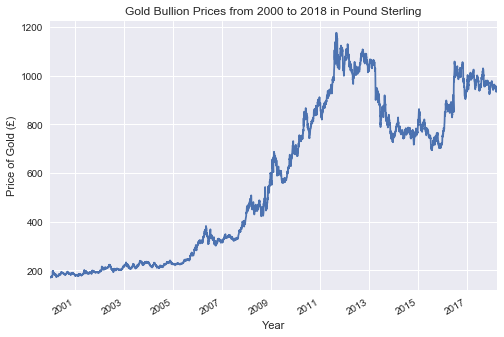

In [152]:
df2['GBP (AM)'].plot('line')
plt.title('Gold Bullion Prices from 2000 to 2018 in Pound Sterling')
plt.xlabel('Year')
plt.ylabel('Price of Gold (£)')
plt.show()

We have successfully imported the data. Given that gold bullion rises with inflation, it is expected to see the steady gradual rise of the price of gold from 2001 to 2013. What is unexpected is the sudden drop from 2013 to 2015. This completes this rather simple introductory project. 